# 01. Neural Network Regression with Tensorflow

## Sub topics
* Architecture of a regression model
* Input shape and outupt shape
    * `X`: Features/data(inputs)
    * `Y`: labels (outputs)

* Creating custom data to view and fit
* Steps in modeling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating eveluation metrics
    * Filtting a model (getting it to find pattenns in our data)

* Eveluating a model
    * Visualizing the model
    * Looking at training curves
    * Compare predictions to ground truth(using the eveluatin metrics)

* Saving a model 
* Loading a model

## Typical architecture of regresion neural network

| **Hyperparameter** | **Typical Value**|
|--|--|
| Input layer shape | Same shape as number of features |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 - 100 |
| Output layer shape | Same shape as desired prediction shape |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"This notebook was last run on: {datetime.datetime.now()}")

2.10.1
This notebook was last run on: 2024-10-03 03:02:19.405721


## Creating data to view and fit

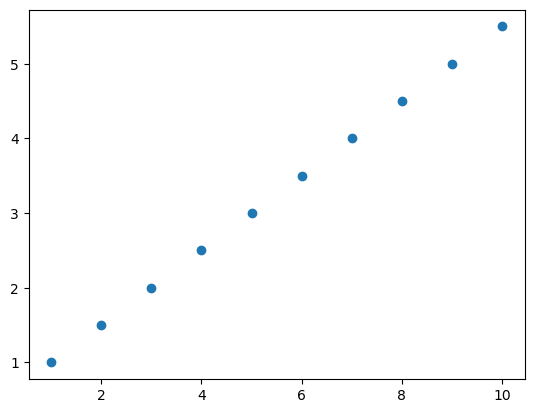

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
# Create labels
y = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], dtype=float)

# Visualize the data
plt.scatter(x, y);

## Regression input shapes and output shapes

* The `input shape` is the shape of the data that gose into the model.
* The `output shape` is the shape of data come out from the model.

In [4]:
# Example input and output shape of the regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([900000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([900000])>)

In [5]:
house_info.shape

TensorShape([3])

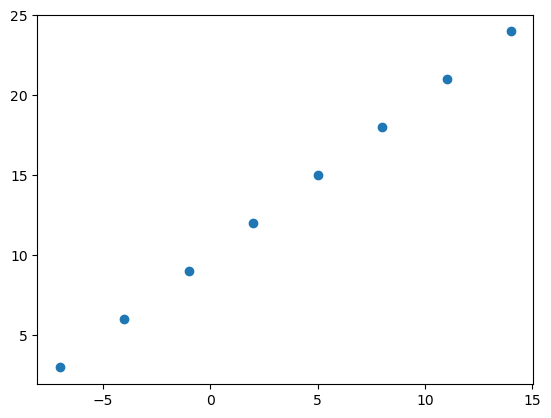

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=float)
# Create labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=float)

# Visualize the data
plt.scatter(x, y);

In [7]:
# Take a single example of x
input_shape = x[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # These are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [8]:
# Single examples invidually
x[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model
1. `Creating a model` - piece together the layers of neural network.
2. `Compilling a model` - defining how a models perfomaces should be measured.
3. `Fitting a model` - letting the model try to find patterns in the data.

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mea is short of mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short of stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 13.0973 - mae: 13.0973
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.9648 - mae: 12.9648
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 12.8323 - mae: 12.8323
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 12.6998 - mae: 12.6998
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 12.5673 - mae: 12.5673


In [10]:
# Check out x, y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Make a prediction with the model
import numpy as np

# Convert the list to a NumPy array
input_data = np.array([17])

# Make a prediction with the model
model.predict(input_data)

1/1 [==============================] - 0s 90ms/step


array([[4.9808693]], dtype=float32)

## Improving a model

To improve model,
1. `Creating a model` - add more layers, increase the number of hidden units (also called neurons) withing each layer, change the activation functions of each layer.
2. `Compilling a model` - Choose opimization function or perhaps change the `learning rate` of the optimization function.
3. `Fitting a model` - Fit a model with more `epochs`.

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model ( Same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model (same as before)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 439ms/step - loss: 19.9398 - mae: 19.9398
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 19.6585 - mae: 19.6585
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 19.3773 - mae: 19.3773
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 19.0960 - mae: 19.0960
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 18.8148 - mae: 18.8148
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 18.5336 - mae: 18.5336
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 18.2523 - mae: 18.2523
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 17.9710 - mae: 17.9710
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 17.6898 - mae: 17.6898
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 17.4085 - mae: 17.4085
Epoch 11/100
1/1 [==============================] - 0s 7m

In [13]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Make Prediction
model.predict(input_data)
#model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[29.678745]], dtype=float32)

## Evaluating a model
`Build a model -> evaluate it -> build (tweak) a model -> evaluate it -> build (tweak) a model -> evaluate it...`

Visualize,
* `The data` - what kind of data working with, what dose it look like?
* `The model itself` - what does the architecure look like? what are the different shapes?
* `The training of a model` - how does a model perform while it learns?
* `The predictions of a model` - how do the predictions of a model line up against the ground truth(the orginal labels)?

In [15]:
# Make a bigger dataset
x = np.arange(-100, 100, 4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [16]:
# Make labels for the dataset 
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test data

* `Training set` - the model learns from this data, which is typically 70-80% of the total data available.
* `Validation set` - the model gets tuned on this data, which is typically 10-15% of the toatal data availabe.
* `Test set` - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total available data.

In [17]:
# Chack how many data have
len(x)

50

In [18]:
# Split data into train and test sets
x_train = x[:40] # first 40 examples (80% of data)
y_train = y[:40]

x_test = x[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

## Visualizing the data

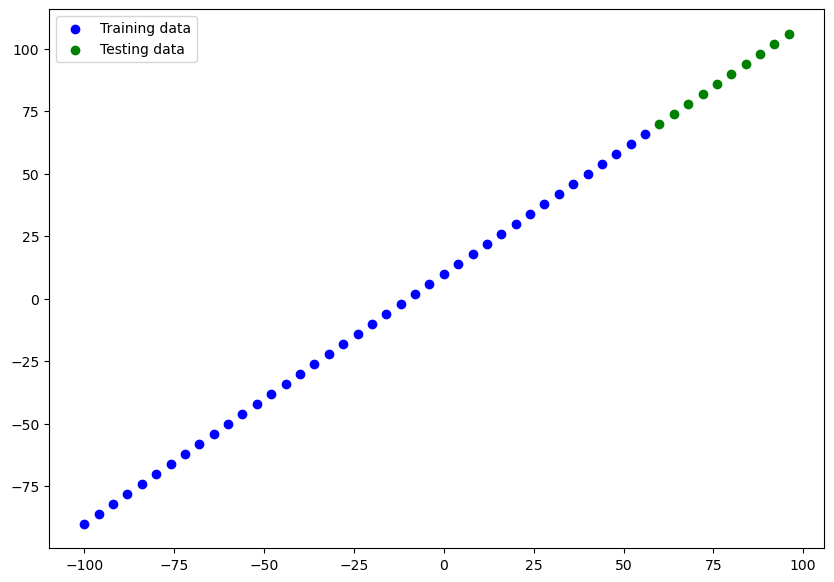

In [19]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(x_test, y_test, c='g', label= 'Testing data')
# Show the legend
plt.legend();

## Visualizing the model

In [20]:
# Set random seeds
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [21]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on model shows the layers it contains, the ouput shape and the number of parameters
* `Total params` - total number of parameters in the model.
* `Trainable parameters` - these ara the parameters (patterns) the model can update as it trains.
* `Non-trainable parameters` - these parameters aren't updated during training.

In [22]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing the prediction


In [25]:
# Make prediction
y_preds = model.predict(x_test)

1/1 [==============================] - 0s 153ms/step


In [26]:
# View the predictions
y_preds

array([[ 74.59309 ],
       [ 79.478584],
       [ 84.36408 ],
       [ 89.24958 ],
       [ 94.13508 ],
       [ 99.02058 ],
       [103.906075],
       [108.79157 ],
       [113.67707 ],
       [118.56256 ]], dtype=float32)

In [27]:
def plot_predictions(train_data = x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictons=y_preds):
    """
    Plot training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot traning data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red
    plt.scatter(test_data, predictons, c="r", label="Predictions")
    # Shows the legend
    plt.legend();

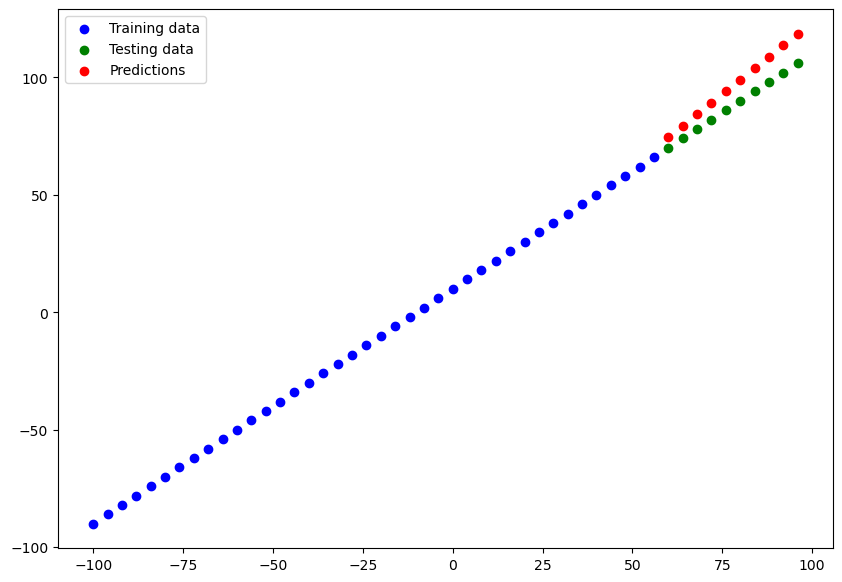

In [28]:
plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictons=y_preds)

## Evaluating predictions
Two of the main metric used for regression problems are:
* `Mean absolute error (MAE)` - the mean difference between each of the predictions.
* `Mean Squared error (MSE)` - the squared mean difference between of the predicrions (use if larger errors are more detrimental than smaller errors).

In [29]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 8.5778 - mae: 8.5778


[8.577826499938965, 8.577826499938965]

In [31]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.444148, 11.808566, 10.327184, 10.      , 10.854032, 13.012346,
       16.32486 , 20.791573, 25.677069, 30.562561], dtype=float32)>

MAE should be a single output,
* This is because `y_test` and `y_preds` are in different shapes.

In [32]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [33]:
# Check the predictions tensor values
y_preds

array([[ 74.59309 ],
       [ 79.478584],
       [ 84.36408 ],
       [ 89.24958 ],
       [ 94.13508 ],
       [ 99.02058 ],
       [103.906075],
       [108.79157 ],
       [113.67707 ],
       [118.56256 ]], dtype=float32)

In [34]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [35]:
# Squeeze the y_preds
y_preds.squeeze().shape

(10,)

In [36]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.59309 ,  79.478584,  84.36408 ,  89.24958 ,  94.13508 ,
         99.02058 , 103.906075, 108.79157 , 113.67707 , 118.56256 ],
       dtype=float32))

In [38]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())

mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.5778265>